In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

In [2]:
texts_df = pd.read_pickle("data/processed/texts.p")
texts_reduced=texts_df[['filename','title','volume','issue','author','language','date','journal_title']]
texts_reduced=texts_reduced.drop_duplicates()
texts_reduced['topics']=texts_df['topics'][texts_reduced.index]

In [17]:
topics_count = pd.Series()
for topics in texts_reduced["topics"]:
    for topic in topics:
        if topic not in topics_count:
            topics_count[topic] = 1
        else:
            topics_count[topic] += 1
            
for topic in topics_count.index:
    texts_reduced[topic]=0

for row in range(len(texts_reduced)):
    for topic in texts_reduced['topics'].iloc[row]:
        texts_reduced.loc[texts_reduced.index[row],topic]=1

In [19]:
texts_corrected=texts_reduced

texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français ou le Nouveau Socrate moderen','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur françois ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.journal_title=='Gazzetta urbana \t\t\t\t\t\tveneta','journal_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.journal_title=='Gazzetta urbana veneta','journal_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français ou Journal des Mœurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français, ou Journal des moeurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.journal_title=='missing'].index)

In [20]:
topic_df=texts_corrected[['language','journal_title']+list(topics_count.index.values)]

#relevant_topics=['Manners and Customs','Autopoetical Reflection','Idea of Man','Politics','Love','Image of Women','Theatre Literature Arts','Morale','Religion']
#topic_df=texts_corrected[['language','journal_title']+relevant_topics]

In [28]:
topics_language=topic_df.groupby('journal_title').sum()
topics_language=topics_language[(topics_language.T != 0).any()]
topics_language=topics_language.div(topics_language.sum(axis=1), axis=0)
topics_language.head()

,Manners and Customs,Autopoetical Reflection,Theatre Literature Arts,Idea of Man,Politics,Law,Science,Nature,Happiness,Philosophy,...,France,America (West India),Superstition,Passion,Italy,Switzerland,Germany,Friendship,Austria,Apologetic of Spain
journal_title,,,,,,,,,,,,,,,,,,,,,
Der Bürger,0.000,0.142857,0.000,0.000000,0.000,0.0,0.00,0.0,0.0,0.000,...,0.000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.0
Der Zuschauer,0.250,0.000000,0.000,0.000000,0.000,0.0,0.25,0.0,0.0,0.000,...,0.000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.0
Die Zuschauerin,0.000,0.107143,0.000,0.071429,0.000,0.0,0.00,0.0,0.0,0.000,...,0.000,0.0,0.0,0.071429,0.000,0.0,0.071429,0.0,0.0,0.0
Donna galante,0.128,0.000000,0.192,0.072000,0.024,0.0,0.00,0.0,0.0,0.000,...,0.008,0.0,0.0,0.000000,0.008,0.0,0.000000,0.0,0.0,0.0
El Amigo y Corresponsal del Censor,0.125,0.000000,0.000,0.000000,0.000,0.0,0.00,0.0,0.0,0.125,...,0.000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.0


In [29]:
language_journal=topic_df.pivot_table(values='Switzerland',index='journal_title',columns='language',aggfunc='count')
language_journal[language_journal > 0] = 1
language_journal = language_journal.fillna(0)
language_journal.head()

language,English,French,German,Italian,Portuguese,Spanish; Castilian,missing
journal_title,,,,,,,
Der Bürger,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Der Zuschauer,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Die Zuschauerin,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Donna galante,0.0,0.0,0.0,1.0,0.0,0.0,0.0
El Amigo y Corresponsal del Censor,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [134]:
from IB import *
ds = dataset(pxy=topics_language.values/np.sum(topics_language.values))
ds.clamped=True
m=model(ds=ds,alpha=0,beta=50,Tmax=8)
m.fit(keep_steps=True)

import os.path
fname='results__all_' + str(m.Tmax) + '.obj'
if not os.path.isfile(fname):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Stored first solution')
file_result = open(fname, 'rb')
old_m=pickle.load(file_result)
if (old_m.Tmax == m.Tmax) and (m.iyt>old_m.iyt):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Better solution found')

step 1: I(X,T) = 2.987, H(T) = 2.987, T = 8, H(X) = 6.044, I(Y,T) = 0.197, I(X,Y) = 1.252, L = -6.853
******************** Beginning IB fit with the following parameters ********************
alpha = 0.00, beta = 50.0, Tmax = 8, p0 = None, wav = None, geo = False,
ctol_abs = 1e-04, ctol_rel = 0e+00, cthresh = 1, ptol = 1e-08, zeroLtol = 0e+00
smoothing_type = None, smoothing_center = None, s = None, d = None
****************************************************************************************
step 2: I(X,T) = 2.922, H(T) = 2.922, T = 8, H(X) = 6.044, I(Y,T) = 0.395, I(X,Y) = 1.252, L = -16.852
step 3: I(X,T) = 2.931, H(T) = 2.931, T = 8, H(X) = 6.044, I(Y,T) = 0.445, I(X,Y) = 1.252, L = -19.339
step 4: I(X,T) = 2.901, H(T) = 2.901, T = 8, H(X) = 6.044, I(Y,T) = 0.489, I(X,Y) = 1.252, L = -21.532
step 5: I(X,T) = 2.892, H(T) = 2.892, T = 8, H(X) = 6.044, I(Y,T) = 0.492, I(X,Y) = 1.252, L = -21.728
step 6: I(X,T) = 2.878, H(T) = 2.878, T = 8, H(X) = 6.044, I(Y,T) = 0.499, I(X,Y) = 1.25

/home/bgeiger/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/bgeiger/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/bgeiger/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/bgeiger/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/bgeiger/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using

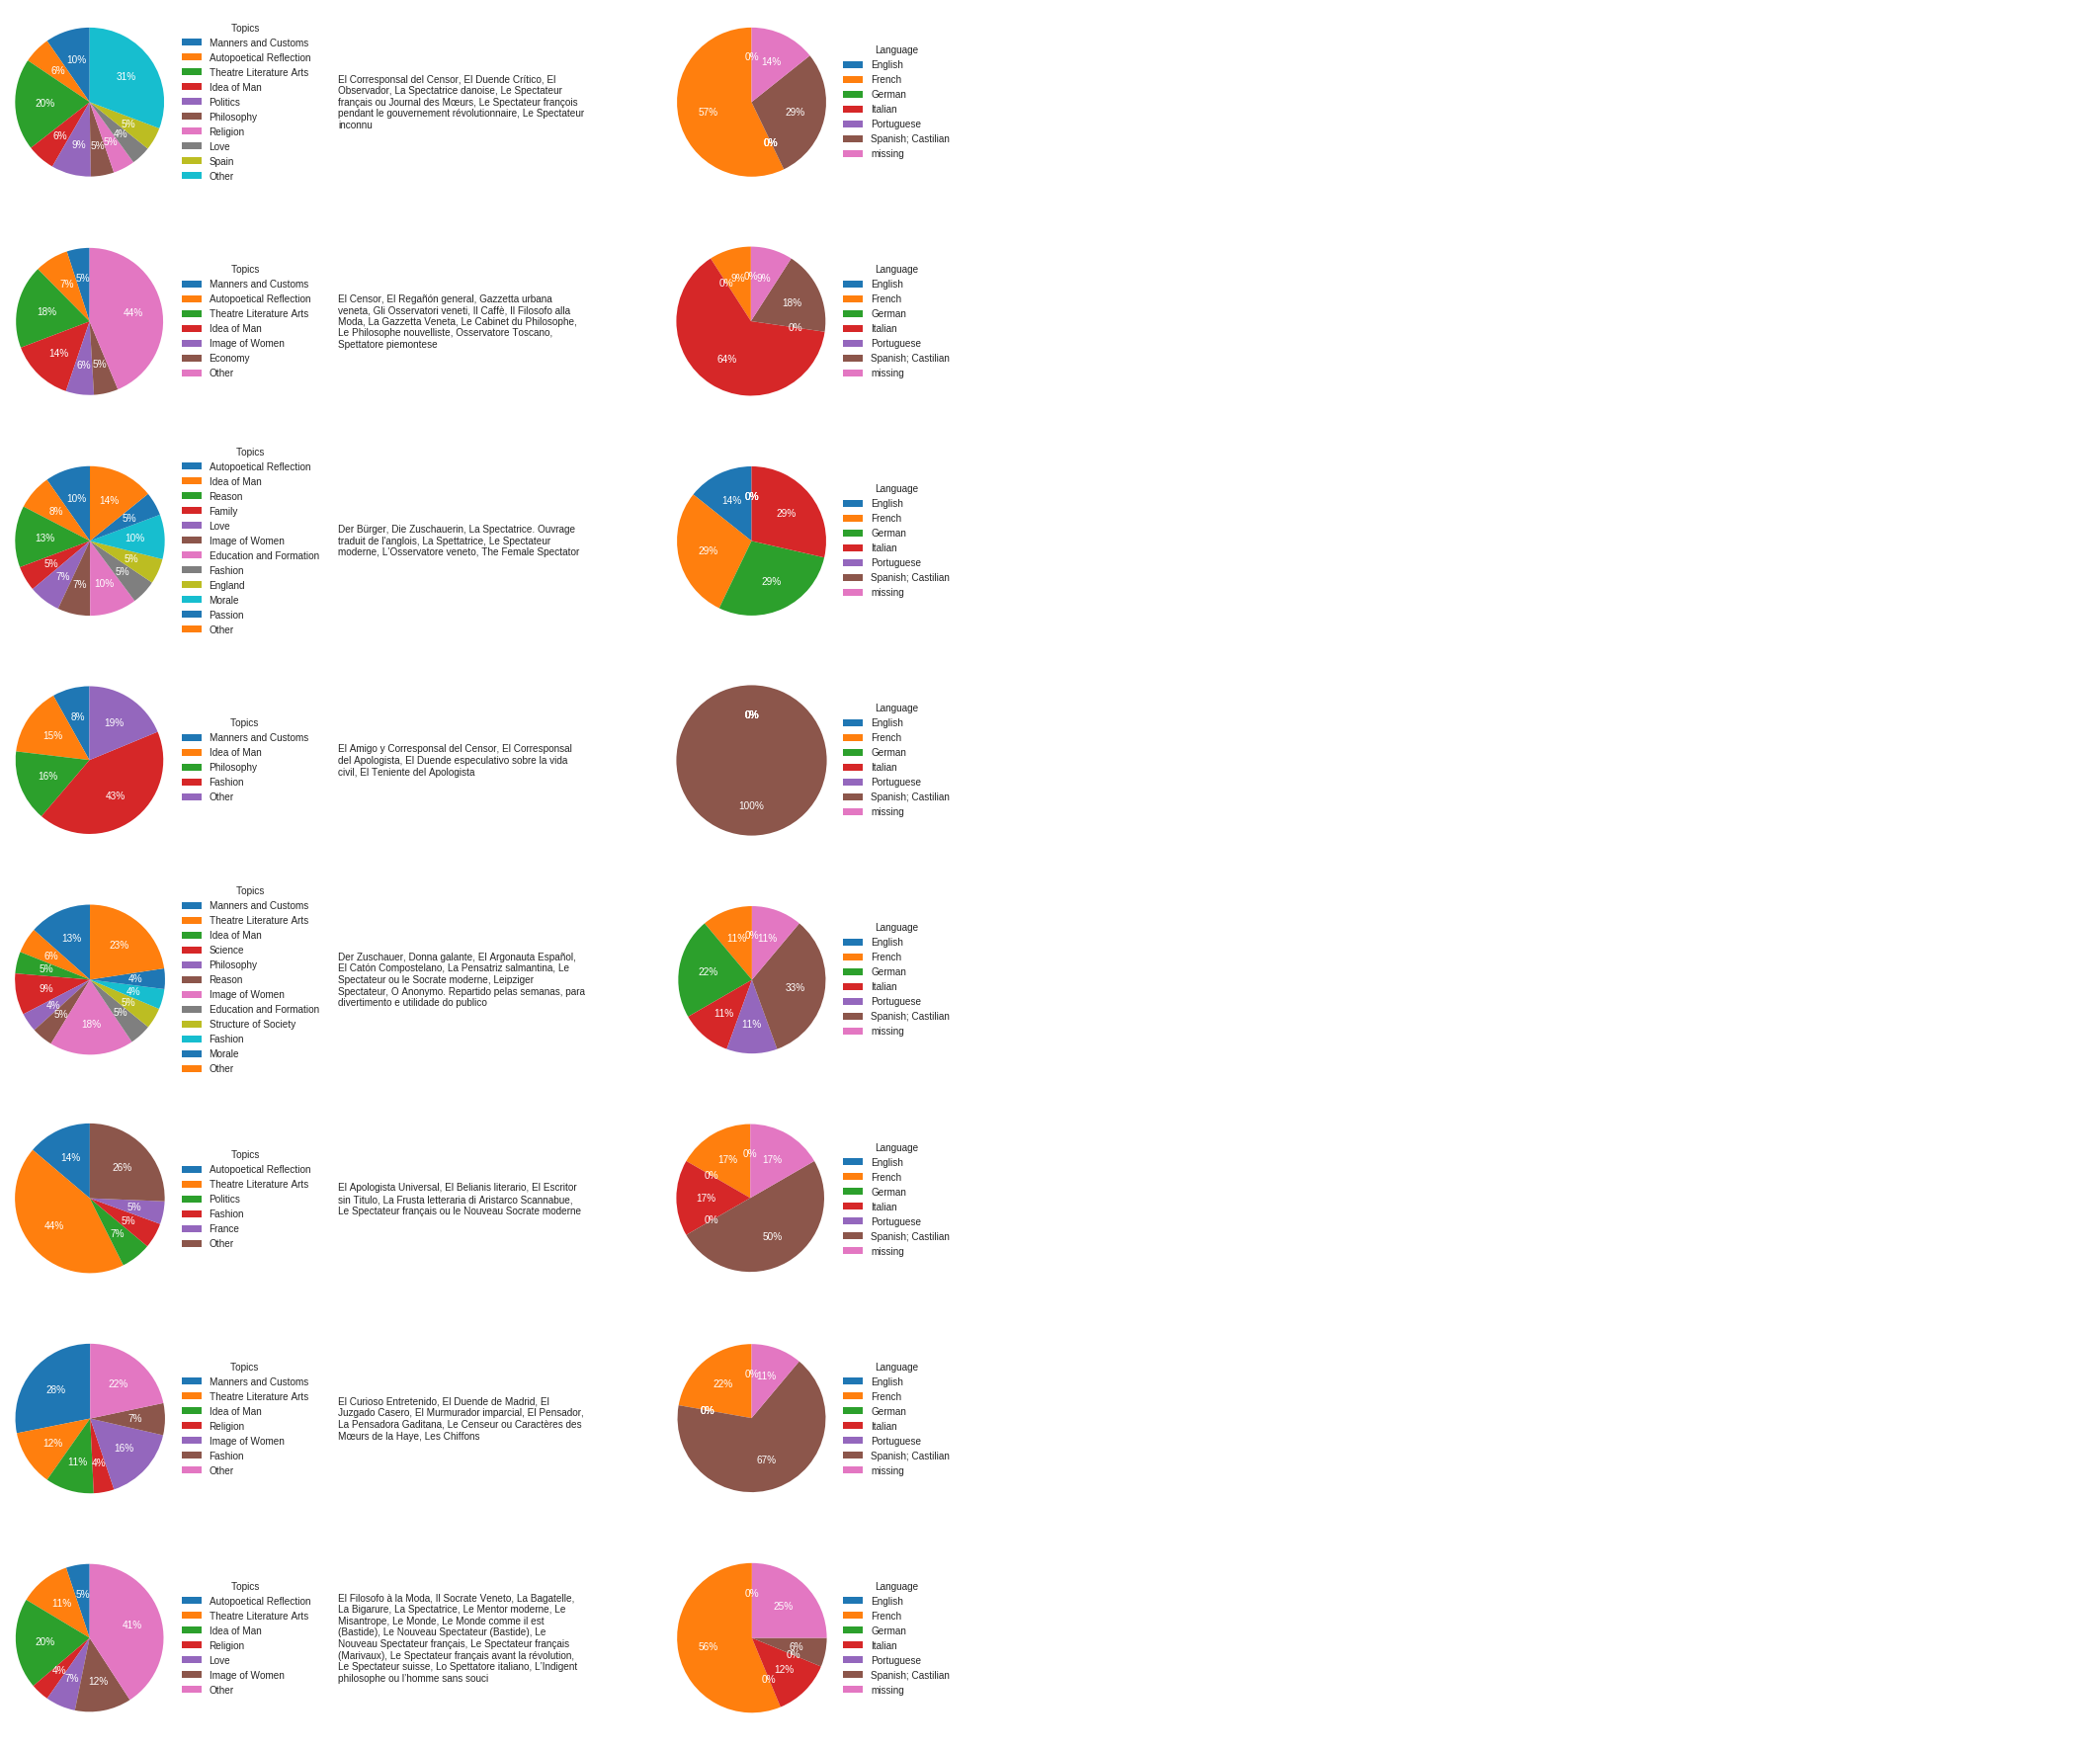

In [136]:
Number_of_Clusters=8
Threshold=0.04

file_result = open('results__all_' + str(Number_of_Clusters) + '.obj', 'rb')
best_m=pickle.load(file_result)

import matplotlib.pyplot as plt
f, axs = plt.subplots(Number_of_Clusters, 3, figsize=(15,4*Number_of_Clusters))
f.subplots_adjust(wspace = 1) 
for Cluster in range(Number_of_Clusters):
    topic_dist=topics_language.loc[best_m.qt_x[Cluster]==1,:].mean()
    relevant_topics=topic_dist[topic_dist>0.04]
    relevant_topics['Other']=1-sum(relevant_topics)

    wedges, texts, autotexts = axs[Cluster][0].pie(relevant_topics, autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][0].legend(wedges, relevant_topics.index,title="Topics",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][0].axis('equal')
    axs[Cluster][1].axis([0, 1, 0, 1])
    axs[Cluster][1].axis('off')
    txt=axs[Cluster][1].text(0, 0.5, ', '.join(topics_language.index[best_m.qt_x[Cluster]==1].values), ha='left',va='center', wrap=True)
    txt._get_wrap_line_width = lambda : 250.
    wedges, texts, autotexts = axs[Cluster][2].pie(language_journal.loc[best_m.qt_x[Cluster]==1,:].sum(), autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][2].legend(wedges, language_journal.columns,title="Language",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][2].axis('equal')
    f.show()

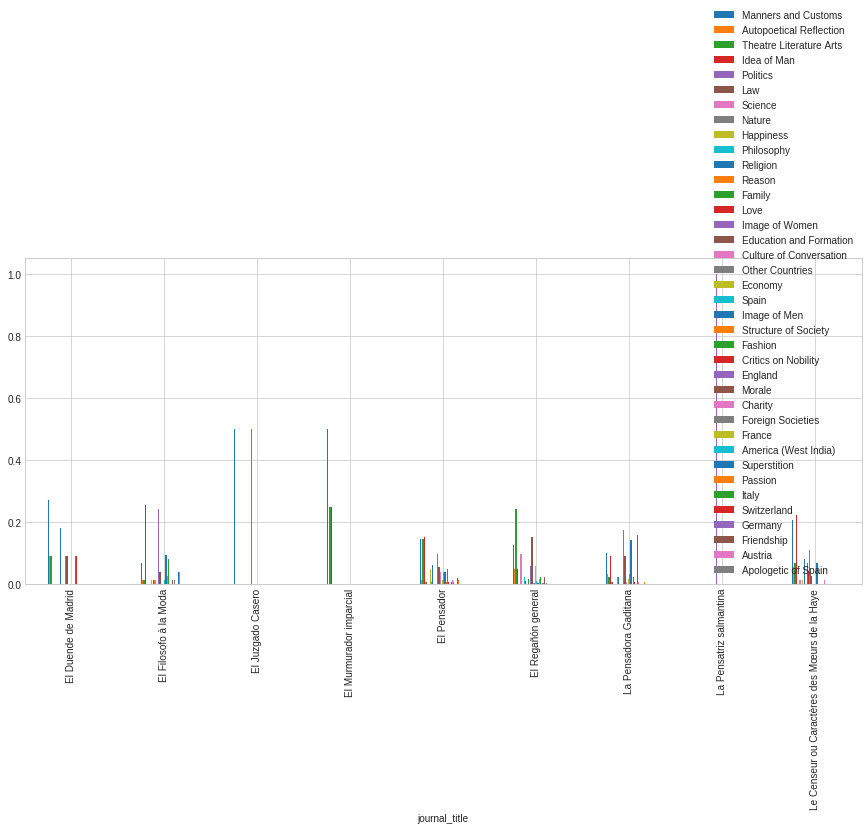

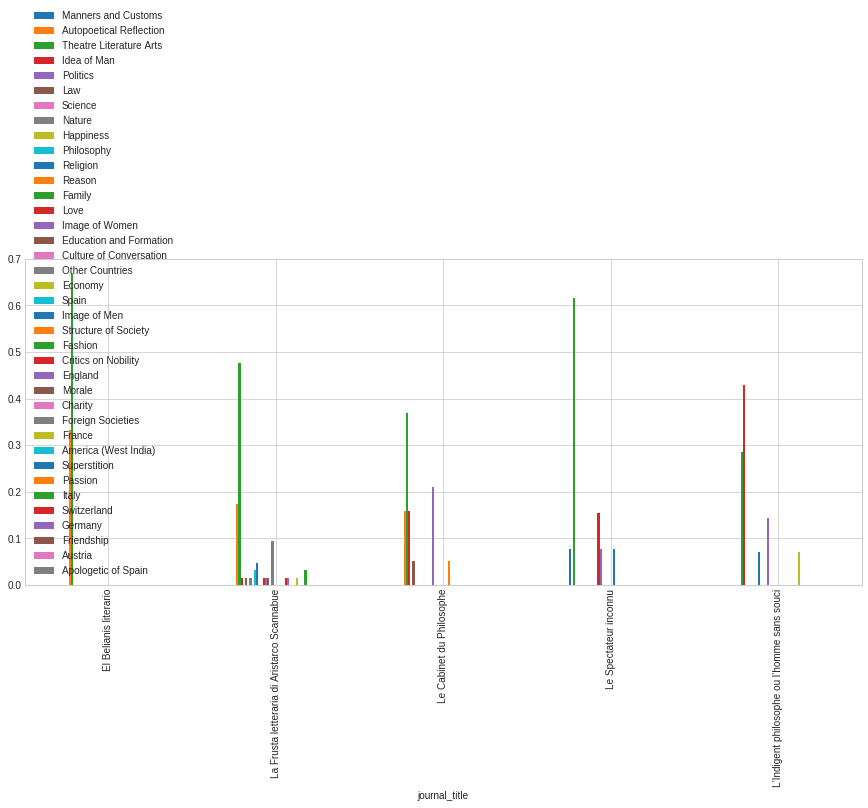

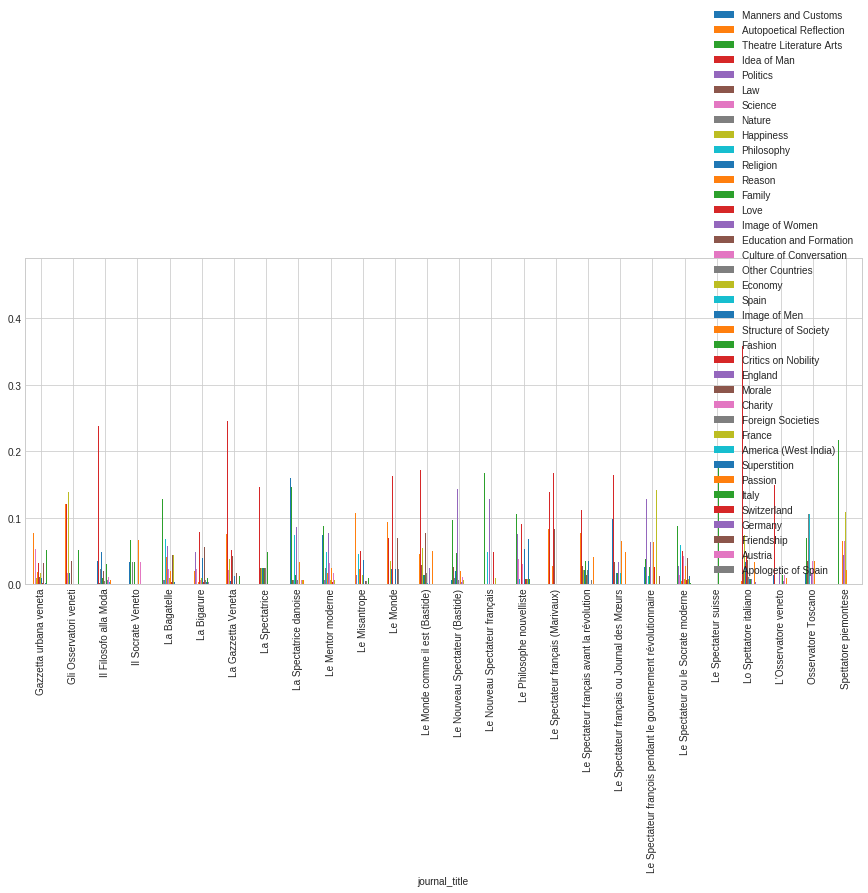

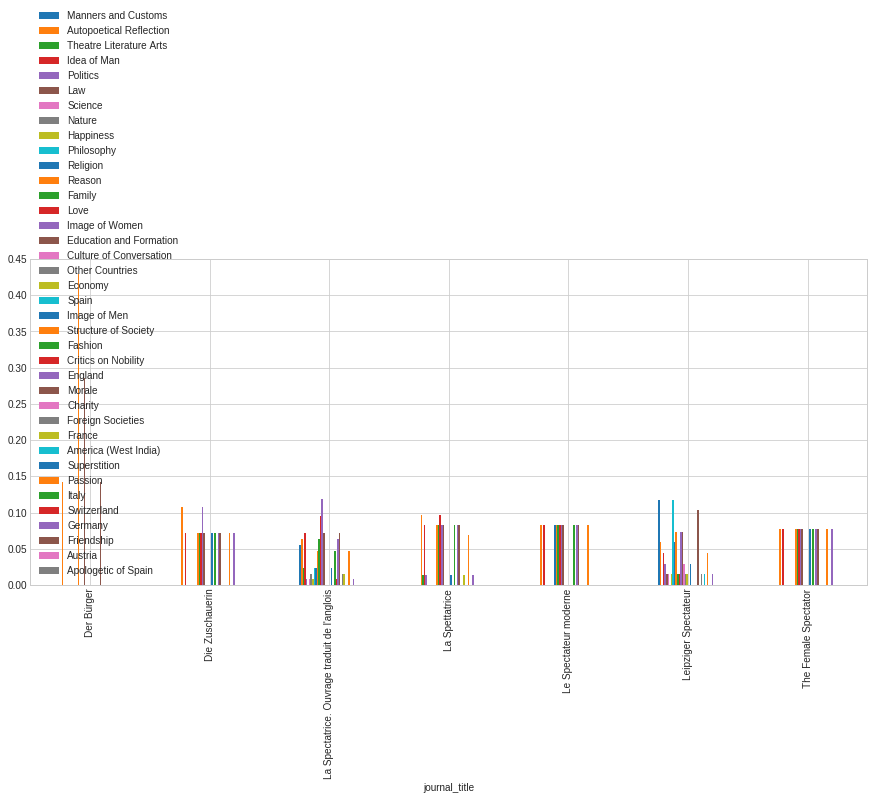

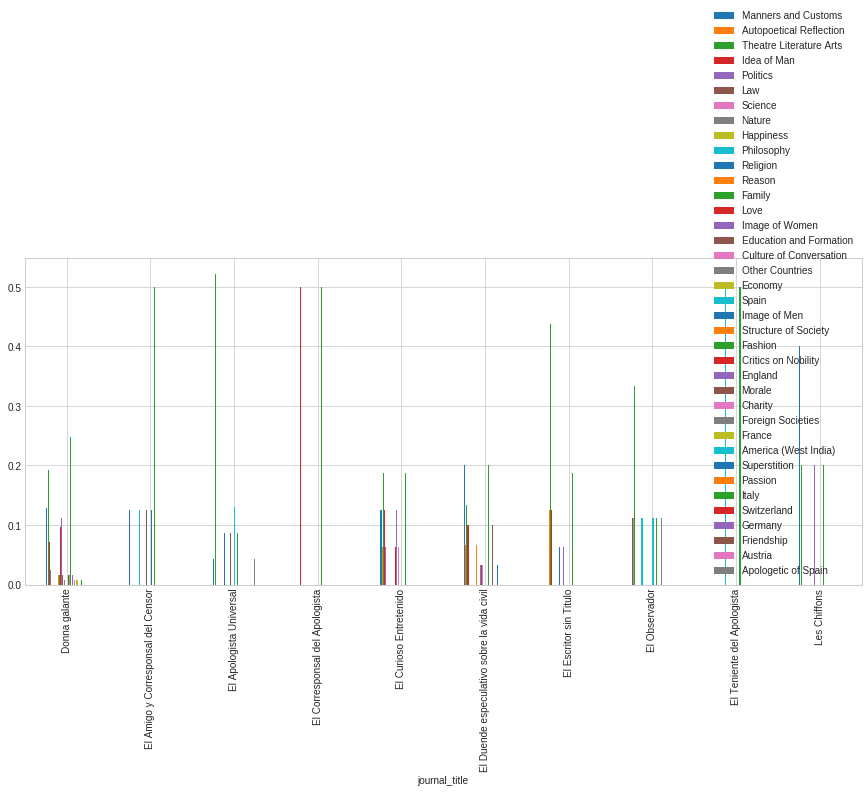

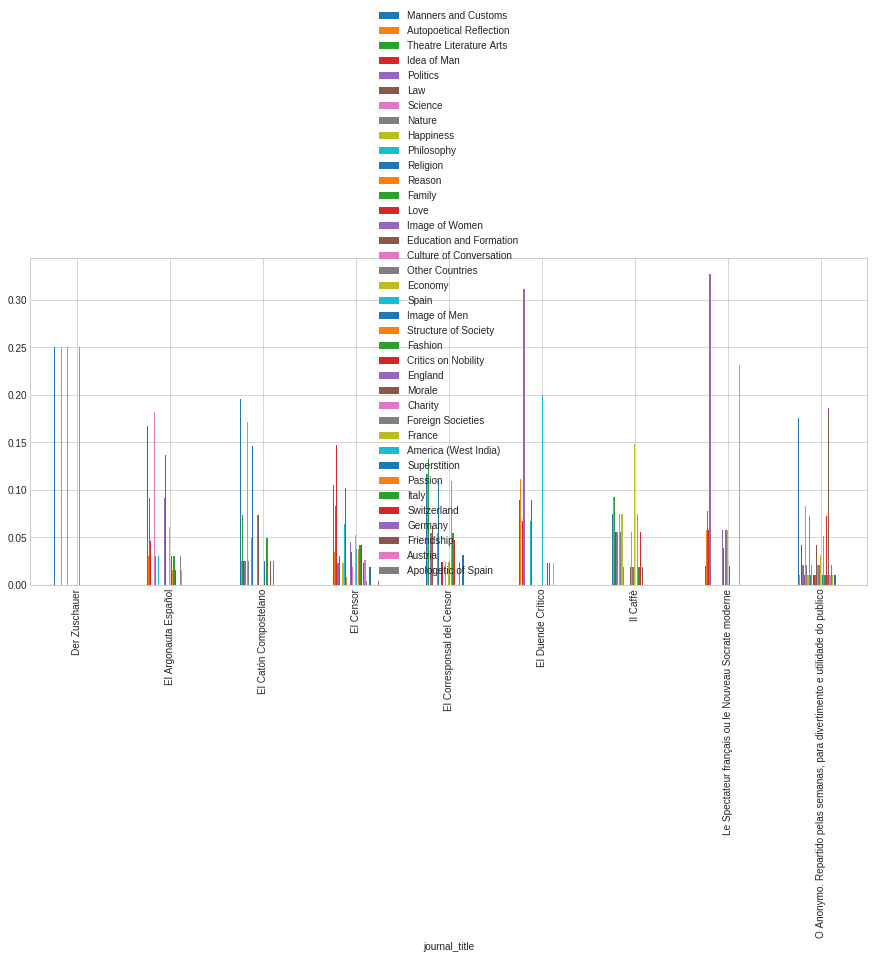

In [83]:
for Cluster in range(Number_of_Clusters):
    axs[Cluster]=topics_language.loc[best_m.qt_x[Cluster]==1,:].plot(kind='bar',figsize=(15,6))